In [1]:
import numpy as np
import tensorflow as tf
import os
from PIL import Image

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
from tensorflow.keras.preprocessing.image import img_to_array, load_img,ImageDataGenerator
from tensorflow.keras.utils import to_categorical

from sklearn.model_selection import train_test_split



2024-02-19 22:28:42.287118: I tensorflow/core/util/port.cc:113] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2024-02-19 22:28:42.313960: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-02-19 22:28:42.314000: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-02-19 22:28:42.314778: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-02-19 22:28:42.319663: I tensorflow/core/platform/cpu_feature_guar

In [2]:
class_labels = os.listdir('chest_xray/train')
class_labels

['PNEUMONIA', 'NORMAL', '.DS_Store']

In [65]:
train_datagen = ImageDataGenerator(rescale = 1./255, validation_split = 0.2)
training_set = train_datagen.flow_from_directory('chest_xray/train', 
                                                 target_size = (256, 256), 
                                                 batch_size = 16,
                                                 class_mode = 'binary',
                                                 color_mode = 'grayscale',
                                                 shuffle = True,
                                                 subset = "training")

validation_set = train_datagen.flow_from_directory('chest_xray/train',
                                                   target_size = (256, 256),
                                                   batch_size = 16,
                                                   class_mode = 'binary',
                                                   color_mode = 'grayscale',
                                                   shuffle = False,
                                                   subset = "validation")

Found 4187 images belonging to 2 classes.
Found 1045 images belonging to 2 classes.


#   LeNet Arch

In [4]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, AveragePooling2D, Flatten, Dense

def lenet5_binary_model(input_shape=(256, 256, 1)):
    model = Sequential()

    # Layer 1
    model.add(Conv2D(6, (5, 5), activation='relu', input_shape=input_shape))
    model.add(AveragePooling2D(pool_size=(2, 2)))

    # Layer 2
    model.add(Conv2D(16, (5, 5), activation='relu'))
    model.add(AveragePooling2D(pool_size=(2, 2)))

    # Flatten the output
    model.add(Flatten())

    # Layer 3
    model.add(Dense(120, activation='relu'))

    # Layer 4
    model.add(Dense(84, activation='relu'))

    # Output layer for binary classification
    model.add(Dense(1, activation='sigmoid'))

    return model

# Create an instance of the LeNet-5 model for binary classification
lenet5_binary = lenet5_binary_model()

lenet5_binary.compile(optimizer='adam',loss = 'binary_crossentropy', metrics=['accuracy'])
# Display the model summary
lenet5_binary.summary()

2024-02-19 22:28:44.742191: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:887] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
2024-02-19 22:28:44.768881: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:887] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
2024-02-19 22:28:44.768928: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:887] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
2024-02-19 22:28:44.772665: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:887] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
2024-02-19 22:28:44.772745: I external/local_xla/xla/stream_executor

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 252, 252, 6)       156       
                                                                 
 average_pooling2d (Average  (None, 126, 126, 6)       0         
 Pooling2D)                                                      
                                                                 
 conv2d_1 (Conv2D)           (None, 122, 122, 16)      2416      
                                                                 
 average_pooling2d_1 (Avera  (None, 61, 61, 16)        0         
 gePooling2D)                                                    
                                                                 
 flatten (Flatten)           (None, 59536)             0         
                                                                 
 dense (Dense)               (None, 120)               7

2024-02-19 22:28:44.772764: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:887] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
2024-02-19 22:28:45.003351: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:887] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
2024-02-19 22:28:45.003451: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:887] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
2024-02-19 22:28:45.003458: I tensorflow/core/common_runtime/gpu/gpu_device.cc:2022] Could not identify NUMA node of platform GPU id 0, defaulting to 0.  Your kernel may not have been built with NUMA support.
2024-02-19 22:28:45.003487: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:8

In [5]:
# test_datagen = ImageDataGenerator(rescale = 1./255)
# test_set = test_datagen.flow_from_directory('chest_xray/test',
#                                             target_size = (256, 256),
#                                             batch_size = 16,
#                                             class_mode = 'binary',
#                                             color_mode = 'grayscale',
#                                             shuffle = False)

Found 624 images belonging to 2 classes.


In [6]:
with tf.device('/gpu:1'):
    lenet5_binary.fit(training_set,validation_data=validation_set,epochs=16)

Epoch 1/16


2024-02-19 22:28:45.988277: I external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:454] Loaded cuDNN version 8904
2024-02-19 22:28:46.132749: I external/local_tsl/tsl/platform/default/subprocess.cc:304] Start cannot spawn child process: No such file or directory
2024-02-19 22:28:46.508444: I external/local_tsl/tsl/platform/default/subprocess.cc:304] Start cannot spawn child process: No such file or directory
2024-02-19 22:28:46.802605: I external/local_xla/xla/service/service.cc:168] XLA service 0x7f77cc750430 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
2024-02-19 22:28:46.802650: I external/local_xla/xla/service/service.cc:176]   StreamExecutor device (0): NVIDIA GeForce RTX 3060 Laptop GPU, Compute Capability 8.6
2024-02-19 22:28:46.807659: I tensorflow/compiler/mlir/tensorflow/utils/dump_mlir_util.cc:269] disabling MLIR crash reproducer, set env var `MLIR_CRASH_REPRODUCER_DIRECTORY` to enable.
I0000 00:00:1708361926.865489    4498 devic

262/262 [==============================] - 23s 77ms/step - loss: 0.2106 - accuracy: 0.9195 - val_loss: 0.1624 - val_accuracy: 0.9388
Epoch 2/16
262/262 [==============================] - 18s 69ms/step - loss: 0.0919 - accuracy: 0.9637 - val_loss: 0.1206 - val_accuracy: 0.9483
Epoch 3/16
262/262 [==============================] - 17s 66ms/step - loss: 0.0693 - accuracy: 0.9761 - val_loss: 0.1367 - val_accuracy: 0.9455
Epoch 4/16
262/262 [==============================] - 17s 66ms/step - loss: 0.0491 - accuracy: 0.9821 - val_loss: 0.1241 - val_accuracy: 0.9531
Epoch 5/16
262/262 [==============================] - 17s 66ms/step - loss: 0.0287 - accuracy: 0.9873 - val_loss: 0.2268 - val_accuracy: 0.9464
Epoch 6/16
262/262 [==============================] - 17s 66ms/step - loss: 0.0286 - accuracy: 0.9916 - val_loss: 0.2533 - val_accuracy: 0.9349
Epoch 7/16
262/262 [==============================] - 17s 65ms/step - loss: 0.0169 - accuracy: 0.9940 - val_loss: 0.1733 - val_accuracy: 0.9560
Epo

In [66]:
y_pred = lenet5_binary.predict(validation_set)
y_pred

66/66 [==============================] - 3s 51ms/step


array([[3.8652227e-04],
       [3.0689258e-09],
       [4.5547441e-07],
       ...,
       [9.9999523e-01],
       [1.0000000e+00],
       [9.9964106e-01]], dtype=float32)

In [67]:
y_pred_new = 1*(y_pred > 0.5)
y_pred_new

array([[0],
       [0],
       [0],
       ...,
       [1],
       [1],
       [1]])

In [68]:
import cv2
import os

# Define the folder path and the desired size
folder = "/home/sagnik/ML_Folder/Pneumonia classification/Dataset/chest_xray/train/PNEUMONIA"
size = (256, 256)

# Loop over the files in the folder
for filename in os.listdir(folder):
  # Check if the file is an image
  if filename.endswith(".jpg") or filename.endswith(".png"):
    # Load the image as a numpy array
    img = cv2.imread(os.path.join(folder, filename))
    # Resize the image to the desired size
    img = cv2.resize(img, size)
    # Convert the image to RGB color mode
    # img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    # Save the image with the same name
    cv2.imwrite(os.path.join(folder, filename), img)


<class 'numpy.ndarray'>
(1044, 1604)


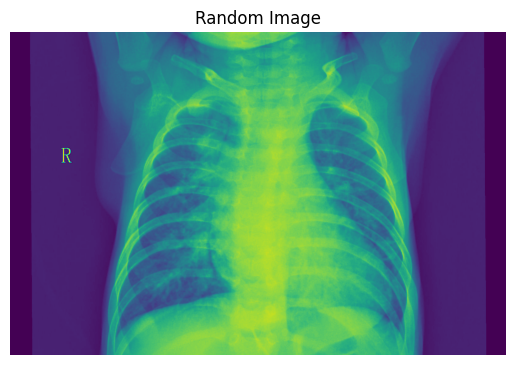

In [69]:
import matplotlib.pyplot as plt
import random
import cv2
# Specify the path to your image folder
image_folder = "/home/sagnik/ML_Folder/Pneumonia classification/Dataset/chest_xray/train/PNEUMONIA"

# Create an empty list to store the images
images = []

# Loop through the files in the folder
for filename in os.listdir(image_folder):
    if filename.endswith((".jpg", ".png", ".jpeg", ".bmp")):
        # Check if the file is an image (you can add more file extensions if needed)
        image_path = os.path.join(image_folder, filename)
        
        with Image.open(image_path) as img:
            # print(img.shape)
            img_array = np.asarray(img)
            images.append(img_array)

# Now, 'images' contains all the images from the folder



# Check if there are any images in the list
if not images:
    print("No image files found in the folder.")
else:
    # Select a random image from the list
    random_image =  random.choice(images) #images[10]
    #print(model.predict(random_image))
    print(type(random_image))
    print(random_image.shape)
    
    # Open and display the random image
    plt.imshow(random_image)
    plt.title('Random Image')
    plt.axis('off')  # Turn off axis labels and ticks
    plt.show()

# assuming x is your input data with shape (32, 256, 3)
#random_image = random_image.reshape(-1, 256, 256, 1) # -1 means infer the batch size automatically
# now x has the shape (32, 256, 256, 3) and can be passed to the model

In [70]:
y_pred = lenet5_binary.predict(validation_set)
y_pred = (y_pred > 0.5)

66/66 [==============================] - 4s 53ms/step


In [71]:
y_pred_round = y_pred.astype(int)
print(y_pred_round)

[[0]
 [0]
 [0]
 ...
 [1]
 [1]
 [1]]


In [72]:
print(test_set)

In [73]:
y_test_set = np.concatenate([validation_set.next()[1] for i in range(validation_set.__len__())])

In [74]:
y_test_set = y_test_set.astype(int)
y_test_set = y_test_set.reshape(len(y_test_set), 1)
print(y_test_set)

[[0]
 [0]
 [0]
 ...
 [1]
 [1]
 [1]]


In [75]:
print(np.concatenate((y_pred_round.reshape(len(y_pred_round), 1), y_test_set.reshape(len(y_test_set), 1)), 1))

[[0 0]
 [0 0]
 [0 0]
 ...
 [1 1]
 [1 1]
 [1 1]]


In [76]:
y_test_set.shape

(1045, 1)

In [77]:
y_pred_new.shape

(1045, 1)

In [78]:
from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(y_test_set, y_pred_new)
print(cm)
accuracy_score(y_test_set, y_pred_new)

[[247  22]
 [ 31 745]]


0.9492822966507177

In [79]:
# random_image.shape
# random_image_1 = cv2.resize(random_image, (256, 256))
# random_image_1= np.array([random_image_1], order='C')
# random_image_1 = np.expand_dims(random_image_1, axis = 0)
# random_image_1 = np.reshape(random_image_1, [256, 256, 3])